
![](https://www.spataru.at/iris-dataset-svm/iris_types.jpg)

# Iris Dataset Notebook

The Iris dataset is one of the most common datasets that exists in the field of computer science. It is widely used as an introduction to data science and machine learning for beginners. 

The Iris dataset is built up of 50 samples of three different species of Iris flowers. The species are:
- Iris Versicolor
- Iris Verginica
- Iris Setosa

Each species was measured by their:
- Sepal length
- Sepal width
- Petal length
- Petal width

In this notebook we are going to explore the differencies between each species of Iris and design a machine learning model to predict a species of Iris with the data input described above.






## Required Imports
For this notebook I will need to import a set of packages. The packages I will be using are described below.

In [68]:
# Import pandas to load iris dataset
import pandas as pd

# Import seadborn for data visualisation
import seaborn as sns
sns.set_palette(sns.color_palette("pastel"))

# Import matplotlib for graph visualisation
import matplotlib.pyplot as plt

## Loading the dataset

In [69]:
# Load the dataset with pandas from URL
iris_dataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# List size of each species in dataset
iris_dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [70]:
# View full dataset
iris_dataset

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0           1.1          0.1     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
16            5.4          3.9           1.3          0.4     setosa
17            5.1          3.5           1.4          0.3     setosa
18            5.7          3.8           1.7          0.3     setosa
19            5.1          3.8           1.5          0.3     setosa
20            5.4          3.4           1.7          0.2     setosa
21            5.1          3.7           1.5          0.4     setosa
22            4.6          3.6           1.0          0.2     setosa
23            5.1          3.3           1.7          0.5     setosa
24            4.8          3.4           1.9          0.2     setosa
25            5.0          3.0           1.6          0.2     setosa
26            5.0          3.4           1.6          0.4     setosa
27            5.2          3.5           1.5          0.2     setosa
28            5.2          3.4           1.4          0.2     setosa
29            4.7          3.2           1.6          0.2     setosa
..            ...          ...           ...          ...        ...
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146

## Dataset Summary

In [71]:
# First 5 rows
iris_dataset.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [72]:
# Last 5 rows
iris_dataset.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [73]:
iris_dataset.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Visualising the Dataset

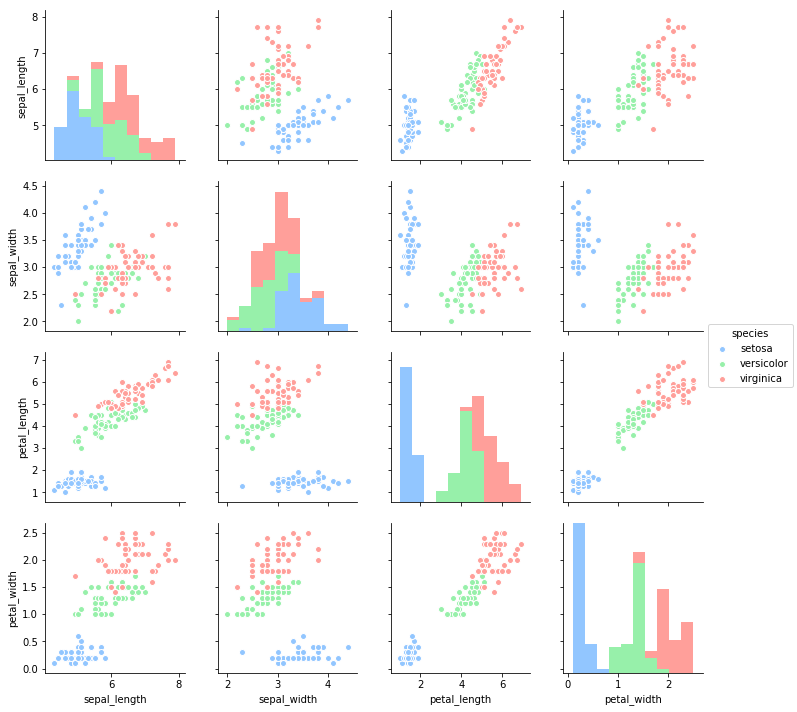

In [74]:
# Draw a pairplot describing each species by speal length, sepal width, petal length and petal width
sns.pairplot(iris_dataset, hue='species')

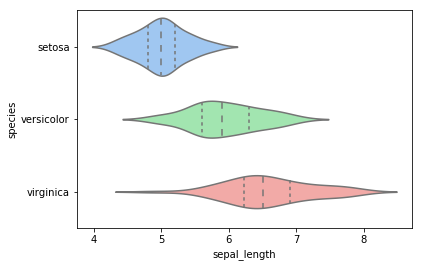

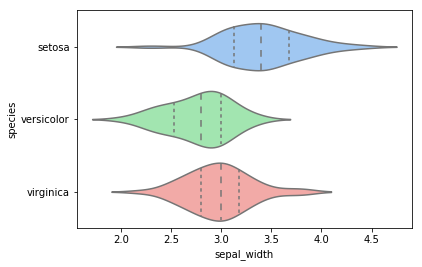

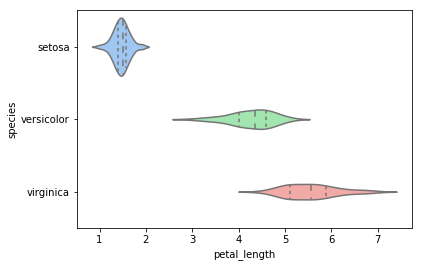

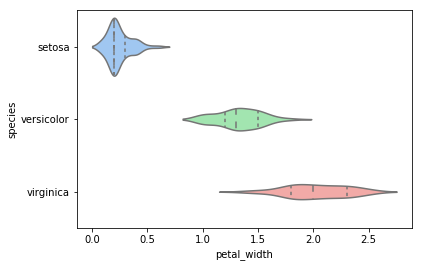

In [75]:
# Draw a vilion plot for each species by sepal length, sepal width, petal length and petal width
violin = sns.violinplot(y='species', x='sepal_length', data=iris_dataset, inner='quartile')
plt.show()
violin = sns.violinplot(y='species', x='sepal_width', data=iris_dataset, inner='quartile')
plt.show()
violin = sns.violinplot(y='species', x='petal_length', data=iris_dataset, inner='quartile')
plt.show()
violin = sns.violinplot(y='species', x='petal_width', data=iris_dataset, inner='quartile')
plt.show()

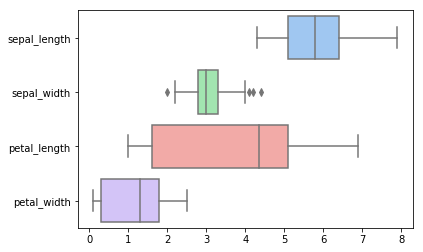

In [76]:
# Draw a boxplot for sepal length, sepal width, petal length and petal width
boxplot = sns.boxplot(data=iris_dataset, orient="h")

- It is clear from the graphs above that the Iris setosa species is distinctly different from the other two species.
- The Iris Versicolor and Verginica species have overlapping characteristics.

## Building the model